In [1]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [2]:
foldpath = os.getcwd()+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
datframe

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,mismatch,faithfulness,snr2,DeltaNOrbits
0,900000.0,10,3.000000e-17,12.000,0.1,0.70,Separatrix reached!,9.914850e-01,0.000748,0.121728,1.069117e+02
1,10000000.0,10,7.000000e-19,4.830,0.1,0.70,Separatrix reached!,2.615451e-09,1.000000,0.861538,-3.206543e-05
2,700000.0,10,2.000000e-17,13.800,0.1,0.63,Separatrix reached!,9.161742e-01,0.008983,NaN,7.588677e-01
3,60000000.0,10,3.000000e-19,4.830,0.3,0.60,Integration reached time boundary. Boundary lo...,6.915473e-01,0.747140,0.000258,2.174460e-01
4,70000000.0,10,2.000000e-19,4.795,0.4,0.90,Integration reached time boundary. Boundary lo...,6.325360e-02,0.943459,0.000487,-2.304093e-02
...,...,...,...,...,...,...,...,...,...,...,...
11838,400000.0,10,8.000000e-18,17.300,0.3,0.83,Separatrix reached!,3.509415e-13,1.000000,NaN,1.263615e-08
11839,400000.0,10,8.000000e-18,17.000,0.5,0.80,Separatrix reached!,6.885603e-13,1.000000,NaN,9.541958e-09
11840,300000.0,10,5.000000e-17,19.600,0.5,0.80,Separatrix reached!,9.820704e-01,0.007768,NaN,4.001646e+01
11841,1000000.0,10,1.000000e-17,10.950,0.4,0.90,Separatrix reached!,1.666452e-01,0.645663,NaN,2.426786e-02


In [8]:
xdat = datframe["SMBHMASS"]
ydat = datframe["PROCAMASS"]
zdat = datframe["faithfulness"]

In [3]:
BHMasses = np.asarray([data[i]["SMBHMASS"] for i in range(len(data))])
ProcaMasses = np.asarray([data[i]["PROCAMASS"] for i in range(len(data))])
Faith = np.asarray([data[i]["faithfulness"] for i in range(len(data))])

interps = []
bhmasses = []
newpran = []
out = {}
for inx, b in enumerate(BHMasses):
    pmass = ProcaMasses[BHMasses==b]
    sorter = np.argsort(pmass)
    pmass = pmass[sorter]
    faith = Faith[BHMasses==b][sorter]
    if len(faith)<2:
        continue
    bhmasses.append(b)
    out[str(b)]=(pmass, faith)
    interps.append(sp.interpolate.interp1d(pmass, faith, bounds_error=False))

In [4]:
xdat = []
ydat = []
zdat = []
for inx, b in enumerate(bhmasses):
    for inx1, p in enumerate(np.arange(min(ProcaMasses), max(ProcaMasses), 1e-18)):
        xdat.append(b)
        ydat.append(p)
        zdat.append(interps[inx](p))

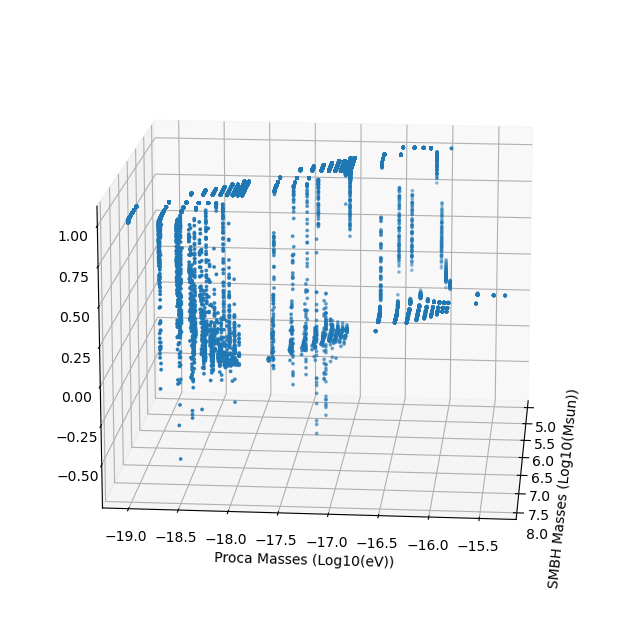

In [9]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,5)

In [28]:
datframe["BHSpin"].unique()
datframe["SMBHMASS"].unique()

array([  900000., 10000000.,   700000., 60000000., 70000000.,   400000.,
        5000000., 90000000., 20000000.,   500000.,  8000000.,  9000000.,
         200000.,   800000.,   300000.,  4000000.,   600000.,  1000000.,
        2000000., 30000000.,  7000000., 40000000.,   100000.,  3000000.,
        6000000., 50000000., 80000000.])

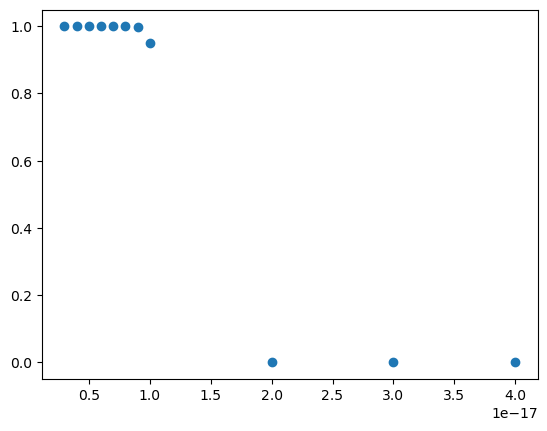

In [31]:
bhmass = 900000
e0 = 0.1
bhspin = 0.86
newdat = datframe[(datframe["SMBHMASS"]==bhmass)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)]
xdat = newdat["PROCAMASS"]
ydat = (newdat["snr2"])**(1/2)
zdat = newdat["faithfulness"]
plt.scatter(xdat,zdat)

In [11]:
newdat

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,mismatch,faithfulness,snr2,DeltaNOrbits
107,200000.0,10,8.000000e-17,26.9,0.5,0.83,Separatrix reached!,9.949822e-01,0.001965,0.172353,504.602154
121,200000.0,10,5.000000e-17,26.9,0.5,0.80,Separatrix reached!,8.832631e-01,0.045940,4.077587,0.994314
345,200000.0,10,6.000000e-17,26.9,0.5,0.66,Separatrix reached!,9.517070e-01,0.019250,1.663804,6.010151
349,200000.0,10,8.000000e-17,26.9,0.5,0.73,Separatrix reached!,9.935156e-01,0.002528,0.219250,304.607311
450,200000.0,10,2.000000e-17,26.9,0.5,0.66,Separatrix reached!,2.436971e-09,1.000000,86.421898,0.000001
...,...,...,...,...,...,...,...,...,...,...,...
11642,200000.0,10,8.000000e-17,26.9,0.5,0.70,Separatrix reached!,9.927310e-01,0.002747,0.237133,260.824921
11765,200000.0,10,9.000000e-17,26.9,0.5,0.60,Separatrix reached!,9.929818e-01,0.002755,NaN,255.190210
11799,200000.0,10,2.000000e-17,26.9,0.5,0.73,Separatrix reached!,4.071685e-09,1.000000,87.644612,0.000002
11800,200000.0,10,6.000000e-17,26.9,0.5,0.73,Separatrix reached!,9.598399e-01,0.015922,1.395441,8.818926
